# MOVING AVERAGE FOR STOCK PRICE PREDICTION (TIME SERIES)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print TOP 5 RECORD
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,04-01-2019,210.60,214.90,210.00,213.50,213.80,1213181,2583.05
1,03-01-2019,214.95,215.35,209.90,210.55,210.05,2096553,4433.50
2,02-01-2019,219.00,220.35,213.60,214.20,214.60,1081778,2340.31
3,01-01-2019,219.95,221.05,218.05,218.95,219.10,716275,1571.63
4,31-12-2018,222.00,223.65,218.85,219.55,219.40,965858,2131.09


In [3]:
# Data type of All Column
# Date column is in Object Format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2100 non-null   object 
 1   Open                  2100 non-null   float64
 2   High                  2100 non-null   float64
 3   Low                   2100 non-null   float64
 4   Last                  2100 non-null   float64
 5   Close                 2100 non-null   float64
 6   Total Trade Quantity  2100 non-null   int64  
 7   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 131.4+ KB


In [4]:
print ('CHECK NULL VALUE FOR EACH COLUMN')
df.isnull().sum()

CHECK NULL VALUE FOR EACH COLUMN


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
# CHECK ANY VALUE IS MISSING OR NOT
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [36]:
# Convert Date Column data type Object to Year-Month-day
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#setting index as date
df.index = df['Date']

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
# SORT DATA FRAME BY INDEX ASENDING ORDER
df = df.sort_index()

print('AFTER SORTING BY DATE(INDEX) ASC ORDER')
df.head()

AFTER SORTING BY DATE(INDEX) ASC ORDER


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
# changing columns NAME with rename() 
data_changed_colname = df.rename(columns = {"Total Trade Quantity": "T_Q", 
                                            "Turnover (Lacs)":"TOver"
                                           }) 

data_changed_colname.head()

,Date,Open,High,Low,Last,Close,T_Q,TOver
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
print('VIEW CORELATION MATRIX ')
corel_matrix = data_changed_colname.corr()

# PRINT CORELATION MATRIX USING COLOR
corel_matrix.style.background_gradient()

VIEW CORELATION MATRIX 


,Open,High,Low,Last,Close,T_Q,TOver
Open,1.000000,0.998996,0.998829,0.997776,0.997841,0.365334,0.594218
High,0.998996,1.000000,0.998774,0.999154,0.999197,0.385175,0.611422
Low,0.998829,0.998774,1.000000,0.999038,0.999106,0.359832,0.589656
Last,0.997776,0.999154,0.999038,1.000000,0.999960,0.378315,0.605601
Close,0.997841,0.999197,0.999106,0.999960,1.000000,0.377886,0.605215
T_Q,0.365334,0.385175,0.359832,0.378315,0.377886,1.000000,0.927437
TOver,0.594218,0.611422,0.589656,0.605601,0.605215,0.927437,1.000000


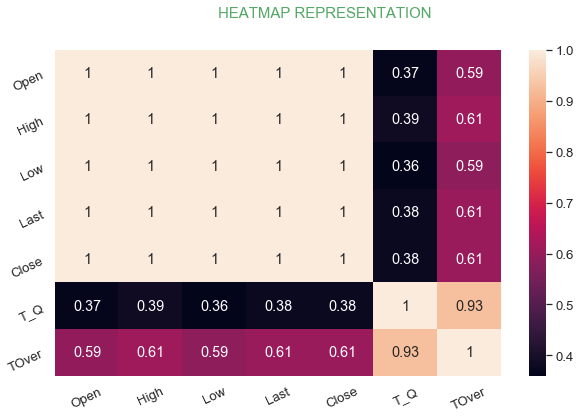

In [10]:
plt.figure(figsize=(10,6))

sns.set(font_scale=1.2)

heat_map = sns.heatmap(corel_matrix, annot = True)

heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=25)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=25)

plt.suptitle('HEATMAP REPRESENTATION', fontsize=15, color='g')
plt.show()

SHARE PRICE WILL CHANGE ON DIFFERENT CIRCUMSTANCE - SO WE WILL NOT REMOVE OUTLIER VALUE


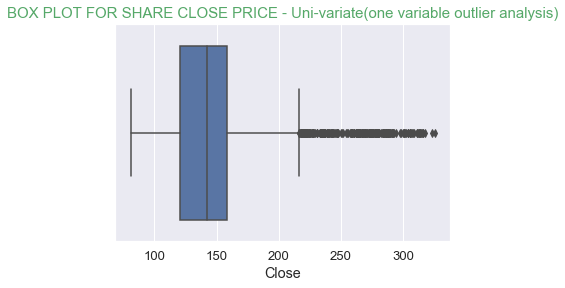

In [11]:
sns.boxplot(x=df['Close'])

plt.title('BOX PLOT FOR SHARE CLOSE PRICE - Uni-variate(one variable outlier analysis)', fontsize=15, color='g')

print('SHARE PRICE WILL CHANGE ON DIFFERENT CIRCUMSTANCE - SO WE WILL NOT REMOVE OUTLIER VALUE')

Text(0.5, 1.0, 'HISTOGRAM PLOT FOR SHARE CLOSEING PRICE ')

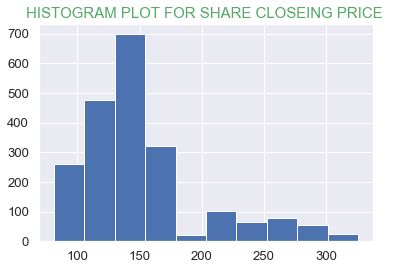

In [12]:
plt.hist(df['Close'])

plt.title('HISTOGRAM PLOT FOR SHARE CLOSEING PRICE ', fontsize=15, color='g')

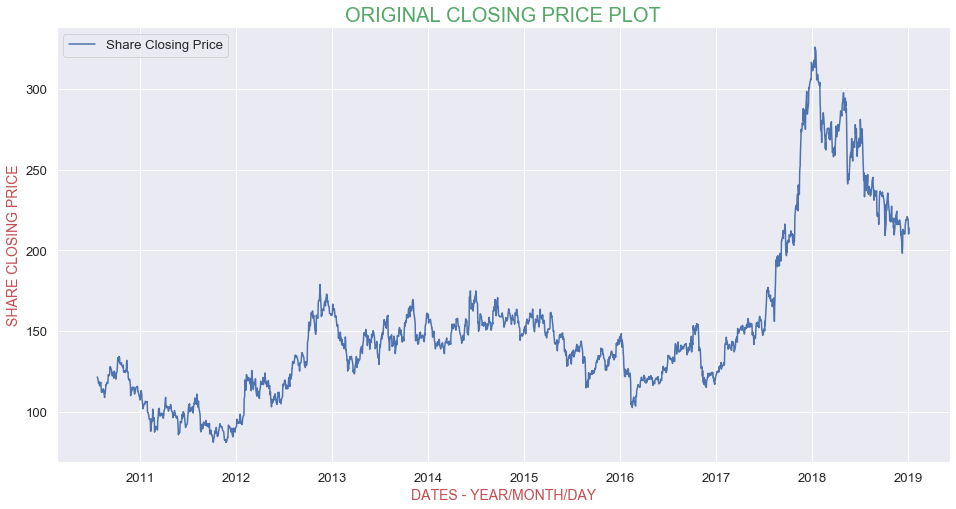

In [13]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Share Closing Price')
plt.title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
plt.xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
plt.ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
plt.legend()

# PREDICT STOCK PRICE USING WINDOW SIZE 7

In [14]:
# Get the STOCK CLOSE PRICE timeseries. This now returns a Pandas Series object indexed by date.
stockcloseingprice = df.loc[:, 'Close']

# PREDICT STOCK PRICE USING WINDOW SIZE 7
short_window_predict = stockcloseingprice.rolling(window=7).mean()
print(type(short_window_predict))

# CONVERT SERIES TO LIST
short_window_list_predict = short_window_predict.to_list()
print('PREDICTION CLOSEING PRICE LIST ','\n', short_window_list_predict[:10])

<class 'pandas.core.series.Series'>
PREDICTION CLOSEING PRICE LIST  
 [nan, nan, nan, nan, nan, nan, 119.17142857142858, 118.38571428571429, 117.87142857142858, 117.53571428571429]


In [15]:
df1 =  df.loc[:,['Date','Close']]
df1.index = range(len(df))
df1.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


# 15 DAYS PREDICTION WINDOW SIZE 7

In [16]:
# 15 DAYS PREDICTION
df_15days = df1.loc[(len(df) - 15):,['Date','Close']]
df_15days['PClose'] = short_window_list_predict[(len(short_window_list_predict) - 15):]
df_15days.head(15)
#df_15days.to_csv('1.1.MA15DaysPredictionWindowSize7.csv')

,Date,Close,PClose
2085,2018-12-14,212.35,207.635714
2086,2018-12-17,210.05,207.907143
2087,2018-12-18,210.10,208.414286
2088,2018-12-19,210.15,210.121429
2089,2018-12-20,210.20,211.171429
2090,2018-12-21,215.40,211.521429
2091,2018-12-24,219.05,212.471429
2092,2018-12-26,218.55,213.357143
2093,2018-12-27,220.05,214.785714
2094,2018-12-28,220.80,216.314286


# ERROR CLACULATION

In [17]:
x = np.power((np.array(df_15days['Close'])-df_15days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('15 DAYS MOVING AVG WINDOW SIZE 7- RMSE VALUE ', rmse)

15 DAYS MOVING AVG WINDOW SIZE 7- RMSE VALUE  4.076228999595369


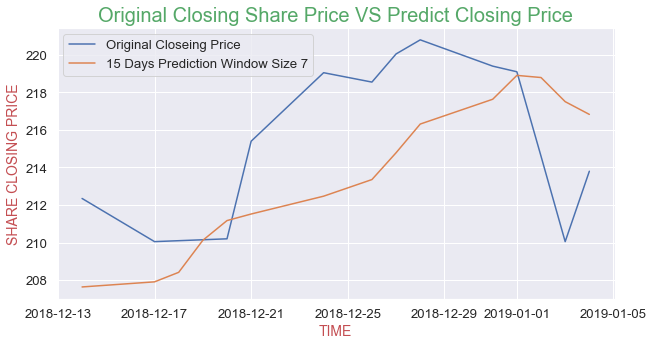

In [18]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_15days['Date'],df_15days['Close'], label='Original Closeing Price')
ax.plot(df_15days['Date'],df_15days['PClose'], label='15 Days Prediction Window Size 7')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# 45 DAYS PREDICTION WINDOW SIZE 7

In [19]:
# 45 DAYS PREDICTION
df_45days = df1.loc[(len(df) - 45):,['Date','Close']]
df_45days['PClose'] = short_window_list_predict[(len(short_window_list_predict) - 45):]
df_45days.head()
#df_45days.to_csv('1.2.MA45DaysPredictionWindowSize7.csv')

,Date,Close,PClose
2055,2018-10-31,217.85,220.421429
2056,2018-11-01,217.75,220.342857
2057,2018-11-02,217.65,220.035714
2058,2018-11-05,219.85,219.714286
2059,2018-11-06,213.80,219.171429


# ERROR CLACULATION

In [20]:
x = np.power((np.array(df_45days['Close'])-df_45days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('45 DAYS MOVING AVG WINDOW SIZE 7- RMSE VALUE ', rmse)

45 DAYS MOVING AVG WINDOW SIZE 7- RMSE VALUE  4.298892042040114


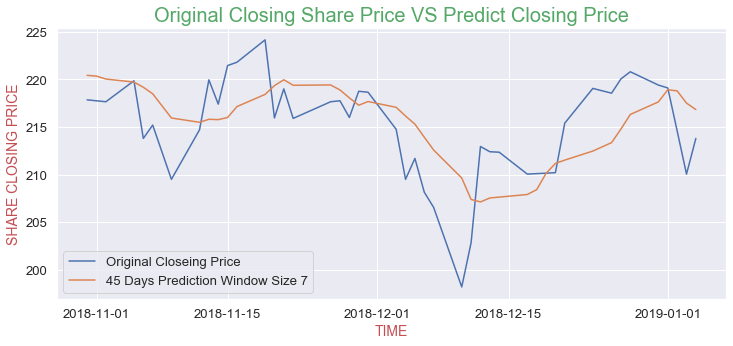

In [21]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(df_45days['Date'],df_45days['Close'], label='Original Closeing Price')
ax.plot(df_45days['Date'],df_45days['PClose'], label='45 Days Prediction Window Size 7')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# 90 DAYS PREDICTION WINDOW SIZE 7

In [22]:
# 90 DAYS PREDICTION
df_90days = df1.loc[(len(df) - 90):,['Date','Close']]
df_90days['PClose'] = short_window_list_predict[(len(short_window_list_predict) - 90):]
df_90days.head()
#df_90days.to_csv('1.3.MA90DaysPredictionWindowSize7.csv')

,Date,Close,PClose
2010,2018-08-23,235.45,239.371429
2011,2018-08-24,231.00,238.864286
2012,2018-08-27,237.05,238.792857
2013,2018-08-28,233.35,237.935714
2014,2018-08-29,234.55,236.728571


# ERROR CLACULATION

In [23]:
x = np.power((np.array(df_90days['Close'])-df_90days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('90 DAYS MOVING AVG WINDOW SIZE 7- RMSE VALUE ', rmse)

90 DAYS MOVING AVG WINDOW SIZE 7- RMSE VALUE  5.735921441632618


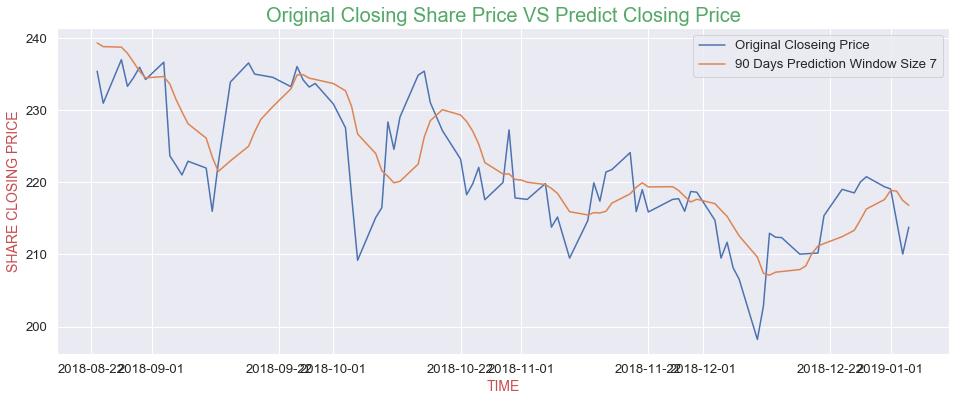

In [24]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df_90days['Date'],df_90days['Close'], label='Original Closeing Price')
ax.plot(df_90days['Date'],df_90days['PClose'], label='90 Days Prediction Window Size 7')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# PREDICT STOCK PRICE USING WINDOW SIZE 90

In [25]:
# PREDICT STOCK PRICE USING WINDOW SIZE 90
long_window_predict = stockcloseingprice.rolling(window=90).mean()

# CONVERT SERIES TO LIST
long_window_list_predict = long_window_predict.to_list()

# 15 DAYS PREDICTION WINDOW SIZE 90

In [26]:
# 15 DAYS PREDICTION
df_15days_long = df1.loc[(len(df) - 15):,['Date','Close']]
df_15days_long['PClose'] = long_window_list_predict[(len(short_window_list_predict) - 15):]
df_15days_long.head(15)

#df_15days_long.to_csv('1.4.MA15DaysPredictionWindowSize90.csv')

,Date,Close,PClose
2085,2018-12-14,212.35,224.909444
2086,2018-12-17,210.05,224.625000
2087,2018-12-18,210.10,224.343333
2088,2018-12-19,210.15,224.071111
2089,2018-12-20,210.20,223.745556
2090,2018-12-21,215.40,223.498889
2091,2018-12-24,219.05,223.306667
2092,2018-12-26,218.55,223.098333
2093,2018-12-27,220.05,222.948333
2094,2018-12-28,220.80,222.795556


# ERROR CLACULATION

In [27]:
x = np.power((np.array(df_15days_long['Close'])-df_15days_long['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('15 DAYS MOVING AVG WINDOW SIZE 90- RMSE VALUE ', rmse)

15 DAYS MOVING AVG WINDOW SIZE 90- RMSE VALUE  9.436304494360497


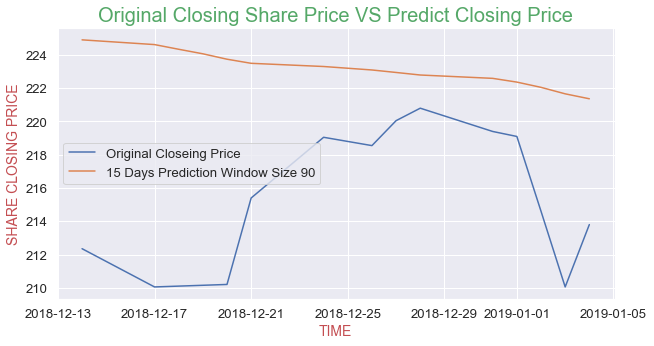

In [28]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_15days_long['Date'],df_15days_long['Close'], label='Original Closeing Price')
ax.plot(df_15days_long['Date'],df_15days_long['PClose'], label='15 Days Prediction Window Size 90')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# 45 DAYS PREDICTION WINDOW SIZE 90

In [29]:
# 45 DAYS PREDICTION
df_45days_long = df1.loc[(len(df) - 45):,['Date','Close']]
df_45days_long['PClose'] = long_window_list_predict[(len(short_window_list_predict) - 45):]
df_45days_long.head()

#df_45days_long.to_csv('1.5.MA45DaysPredictionWindowSize90.csv')

,Date,Close,PClose
2055,2018-10-31,217.85,239.046111
2056,2018-11-01,217.75,238.567222
2057,2018-11-02,217.65,238.116667
2058,2018-11-05,219.85,237.647222
2059,2018-11-06,213.80,237.083889


# ERROR CLACULATION

In [30]:
x = np.power((np.array(df_45days_long['Close'])-df_45days_long['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('45 DAYS MOVING AVG WINDOW SIZE 90- RMSE VALUE ', rmse)

45 DAYS MOVING AVG WINDOW SIZE 90- RMSE VALUE  15.200037171232774


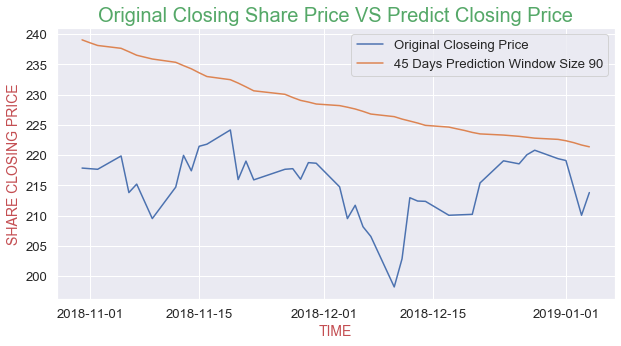

In [31]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_45days_long['Date'],df_45days_long['Close'], label='Original Closeing Price')
ax.plot(df_45days_long['Date'],df_45days_long['PClose'], label='45 Days Prediction Window Size 90')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# 90 DAYS PREDICTION WINDOW SIZE 90

In [32]:
# 90 DAYS PREDICTION
df_90days_long = df1.loc[(len(df) - 90):,['Date','Close']]
df_90days_long['PClose'] = long_window_list_predict[(len(short_window_list_predict) - 90):]
df_90days_long.head()
#df_90days_long.to_csv('1.6.MA90DaysPredictionWindowSize90.csv')

,Date,Close,PClose
2010,2018-08-23,235.45,260.917222
2011,2018-08-24,231.00,260.362222
2012,2018-08-27,237.05,259.839444
2013,2018-08-28,233.35,259.252222
2014,2018-08-29,234.55,258.677222


# ERROR CLACULATION

In [33]:
x = np.power((np.array(df_90days_long['Close'])-df_90days_long['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('90 DAYS MOVING AVG WINDOW SIZE 90- RMSE VALUE ', rmse)

90 DAYS MOVING AVG WINDOW SIZE 90- RMSE VALUE  19.439599810141694


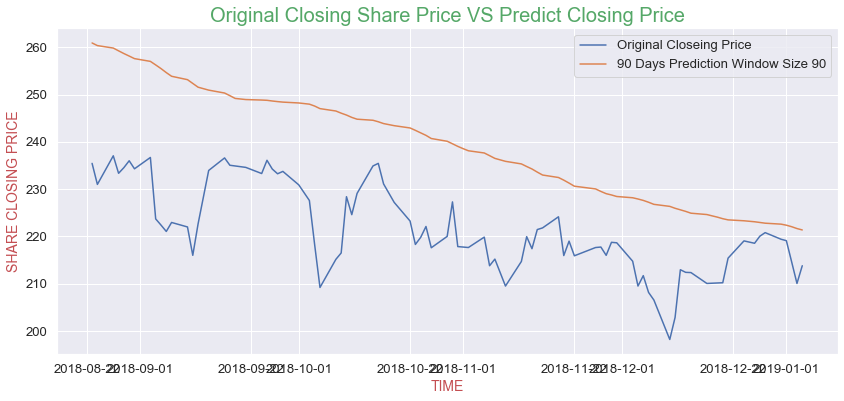

In [34]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df_90days_long['Date'],df_90days_long['Close'], label='Original Closeing Price')
ax.plot(df_90days_long['Date'],df_90days_long['PClose'], label='90 Days Prediction Window Size 90')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
#plt.setp( ax.get_xticklabels(), visible=False)
ax.legend()

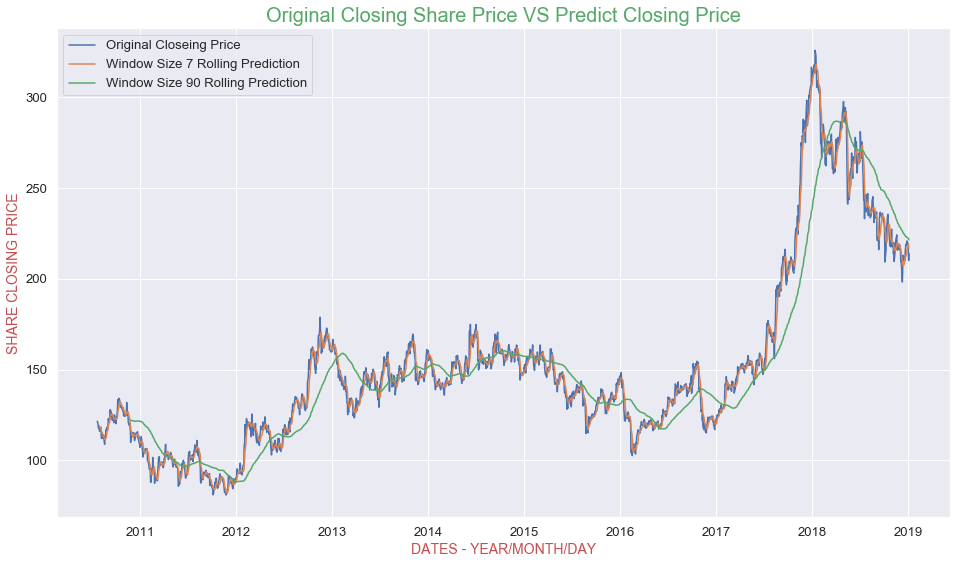

In [35]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stockcloseingprice.index, stockcloseingprice, label='Original Closeing Price')
ax.plot(short_window_predict.index, short_window_predict, label='Window Size 7 Rolling Prediction')
ax.plot(long_window_predict.index, long_window_predict, label='Window Size 90 Rolling Prediction')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()